Importing packages required ...

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score

/home/shreyas/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Part 1

Reading data from text file which is in the json format

In [2]:
with open('transactions.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

Data is stored in a list where every element corresponds to the single transaction. Lets have a look at one of the transaction which is in the json format

In [3]:
status[0]

{'accountNumber': '733493772',
 'accountOpenDate': '2014-08-03',
 'acqCountry': 'US',
 'availableMoney': 5000.0,
 'cardCVV': '492',
 'cardLast4Digits': '9184',
 'cardPresent': False,
 'creditLimit': 5000.0,
 'currentBalance': 0.0,
 'currentExpDate': '04/2020',
 'customerId': '733493772',
 'dateOfLastAddressChange': '2014-08-03',
 'echoBuffer': '',
 'enteredCVV': '492',
 'expirationDateKeyInMatch': False,
 'isFraud': True,
 'merchantCategoryCode': 'rideshare',
 'merchantCity': '',
 'merchantCountryCode': 'US',
 'merchantName': 'Lyft',
 'merchantState': '',
 'merchantZip': '',
 'posConditionCode': '01',
 'posEntryMode': '05',
 'posOnPremises': '',
 'recurringAuthInd': '',
 'transactionAmount': 111.33,
 'transactionDateTime': '2016-01-08T19:04:50',
 'transactionType': 'PURCHASE'}

Now storing the list of dictionaries in the pandas dataframe

In [4]:
transaction=pd.DataFrame(status)

In [5]:
len(transaction)

641914

There are 641914 number of transactions in the data

In [6]:
len(transaction.columns)

29

And 29 features

In [7]:
transaction.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'echoBuffer', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCity', 'merchantCountryCode', 'merchantName', 'merchantState',
       'merchantZip', 'posConditionCode', 'posEntryMode', 'posOnPremises',
       'recurringAuthInd', 'transactionAmount', 'transactionDateTime',
       'transactionType'],
      dtype='object')

These are all the information we have for every transaction

Lets have a look at the dataframe which has the transactions. Before that lets change max number of columns to display all the columns present in the dataframe.

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
transaction.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


Lets have a look at number of values which are not present

In [10]:
transaction.isnull().sum(axis=0)

accountNumber               0
accountOpenDate             0
acqCountry                  0
availableMoney              0
cardCVV                     0
cardLast4Digits             0
cardPresent                 0
creditLimit                 0
currentBalance              0
currentExpDate              0
customerId                  0
dateOfLastAddressChange     0
echoBuffer                  0
enteredCVV                  0
expirationDateKeyInMatch    0
isFraud                     0
merchantCategoryCode        0
merchantCity                0
merchantCountryCode         0
merchantName                0
merchantState               0
merchantZip                 0
posConditionCode            0
posEntryMode                0
posOnPremises               0
recurringAuthInd            0
transactionAmount           0
transactionDateTime         0
transactionType             0
dtype: int64

Above results show that no column has the missing values. However when we had displayed 5 rows in the dataframe, we could see that some of the columns like merchantZip dont have any value.
The missing values dont have any datatype and lets replace it by NaN (Not a number which denotes missing value)

In [11]:
transaction=(transaction.replace(r'^\s*$', np.nan, regex=True))

In [12]:
transaction.isnull().sum(axis=0)

accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

Now we can see that some of the columns have missing values. Lets deal with them

Some columns have same number of missing values as that of the number of rows (641914). We cant impute those values and lets entirely remove these columns

In [13]:
transaction=transaction.drop(['merchantCity','echoBuffer','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1)

Lets deal with other columns having missing values

#### 1) acqCountry

In [14]:
transaction['acqCountry'].value_counts()/len(transaction)

US     0.985028
MEX    0.004091
CAN    0.002913
PR     0.001873
Name: acqCountry, dtype: float64

Almost 99% of the values in the column has value 'US'. The number of missing values are 3193 which is greater than other values. In this case we cant even replace the values by mean as it is a categorical variable. Now, lets fill the missing values with the element having maximum frequency which is 'US'. We can also use some method like linear regression to predict the values in this case but the category having maximum frequency is dominating the column by large margin and so it would have become unbalanced dataset which would have resulted in 'US' only in most of the cases. So we replaced it with the maximum frequency element.

In [15]:
transaction['acqCountry']= transaction['acqCountry'].fillna(transaction['acqCountry'].value_counts().idxmax())


#### 2) Transaction Type:

In [16]:
transaction['transactionType'].value_counts()

PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64

In [17]:
transaction['transactionType']= transaction['transactionType'].fillna(transaction['transactionType'].value_counts().idxmax())

#### 3) Merchant country code

In [18]:
transaction['merchantCountryCode'].value_counts()

US     635577
MEX      2636
CAN      1874
PR       1203
Name: merchantCountryCode, dtype: int64

In [19]:
transaction['merchantCountryCode']= transaction['merchantCountryCode'].fillna(transaction['merchantCountryCode'].value_counts().idxmax())


#### 4) posConditionCode

In [20]:
transaction['posConditionCode'].value_counts()

01    514144
08    121507
99      5976
Name: posConditionCode, dtype: int64

In [21]:
transaction['posConditionCode']= transaction['posConditionCode'].fillna(transaction['posConditionCode'].value_counts().idxmax())

The same logic can be applied for all of the above columns. The number of missing values are too less and the maximum frequency element is highy dominant in the columns which lead us to replace missing values by the maximum element only.

In [22]:
transaction['posEntryMode'].value_counts()

05    255615
09    193193
02    160589
90     16251
80     12921
Name: posEntryMode, dtype: int64

In [23]:
transaction['posEntryMode']= transaction['posEntryMode'].fillna('00')

In this case, all the categories have almost equal of comparable distribution. So, we cant directly replace it with maximum element. However we can apply multi-class classification to predict the category which will be computationally heavy task for 0.5% of rows for a single column. Also this method doesnt guarantee the correct imputation. So, the simplest thing we can do is we can create another category for the missing values.

No method guarantees the perfect imputation as it is the complete unsupervised method. We are not aware of the results and can be completely random. Also its not even worth to invest large amount of time and resources to impute very small fraction of values. 

In [24]:
transaction.isnull().sum(axis=0)

accountNumber               0
accountOpenDate             0
acqCountry                  0
availableMoney              0
cardCVV                     0
cardLast4Digits             0
cardPresent                 0
creditLimit                 0
currentBalance              0
currentExpDate              0
customerId                  0
dateOfLastAddressChange     0
enteredCVV                  0
expirationDateKeyInMatch    0
isFraud                     0
merchantCategoryCode        0
merchantCountryCode         0
merchantName                0
posConditionCode            0
posEntryMode                0
transactionAmount           0
transactionDateTime         0
transactionType             0
dtype: int64

Now number of missing values are 0 in every column and we have successfully imputed the missing values.

In [25]:
transaction.dtypes

accountNumber                object
accountOpenDate              object
acqCountry                   object
availableMoney              float64
cardCVV                      object
cardLast4Digits              object
cardPresent                    bool
creditLimit                 float64
currentBalance              float64
currentExpDate               object
customerId                   object
dateOfLastAddressChange      object
enteredCVV                   object
expirationDateKeyInMatch       bool
isFraud                        bool
merchantCategoryCode         object
merchantCountryCode          object
merchantName                 object
posConditionCode             object
posEntryMode                 object
transactionAmount           float64
transactionDateTime          object
transactionType              object
dtype: object

After having look at the the columns, I realized that some of the columns which are in the numeric format have data types object. Also the columns which contain dates are in the object format. Lets, change the datatypes of these columns

In [26]:
transaction.head(3)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE


Converting numeric columns to Int

In [27]:
transaction['accountNumber']=transaction['accountNumber'].astype(str).astype(int)

In [28]:
transaction['cardCVV']=transaction['cardCVV'].astype(str).astype(int)

In [29]:
transaction['cardLast4Digits']=transaction['cardLast4Digits'].astype(str).astype(int)

In [30]:
transaction['enteredCVV']=transaction['enteredCVV'].astype(str).astype(int)

Converting columns having dates to type datatime

In [31]:
transaction['transactionDateTime'] =  pd.to_datetime(transaction['transactionDateTime'])

In [32]:
transaction['accountOpenDate'] =  pd.to_datetime(transaction['accountOpenDate'])

In [33]:
transaction['currentExpDate'] =  pd.to_datetime(transaction['currentExpDate'])

In [34]:
transaction['dateOfLastAddressChange'] =  pd.to_datetime(transaction['dateOfLastAddressChange'])

### Part 2

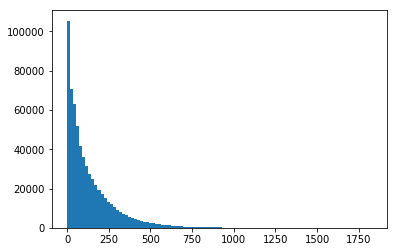

In [35]:
plt.hist(transaction['transactionAmount'],bins=100)
plt.show()

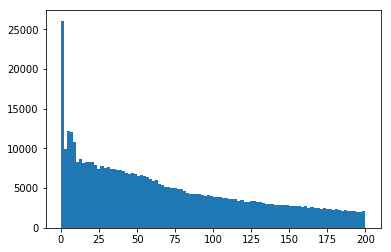

In [36]:
plt.hist(transaction[transaction['transactionAmount']<200]['transactionAmount'],bins=100)
plt.show()

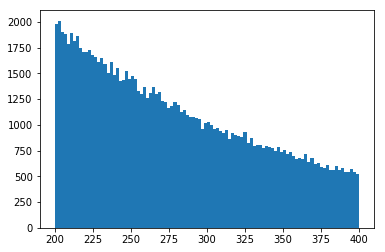

In [37]:
plt.hist(transaction[(transaction['transactionAmount']>=200)&(transaction['transactionAmount']<400)]['transactionAmount'],bins=100)
plt.show()


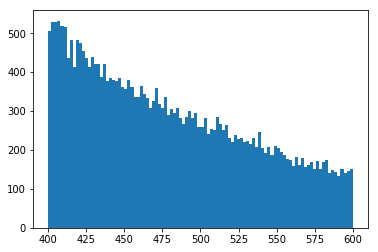

In [38]:
plt.hist(transaction[(transaction['transactionAmount']>=400)&(transaction['transactionAmount']<600)]['transactionAmount'],bins=100)
plt.show()


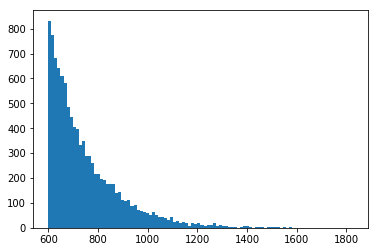

In [39]:
plt.hist(transaction[transaction['transactionAmount']>=600]['transactionAmount'],bins=100)
plt.show()

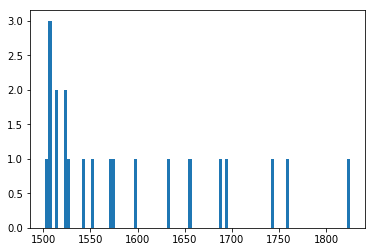

In [40]:
plt.hist(transaction[transaction['transactionAmount']>=1500]['transactionAmount'],bins=100)
plt.show()

In [55]:
transaction['transactionAmount'].mean()

135.16249698556928

In [42]:
catmean=transaction.groupby('merchantCategoryCode')['transactionAmount'].mean()


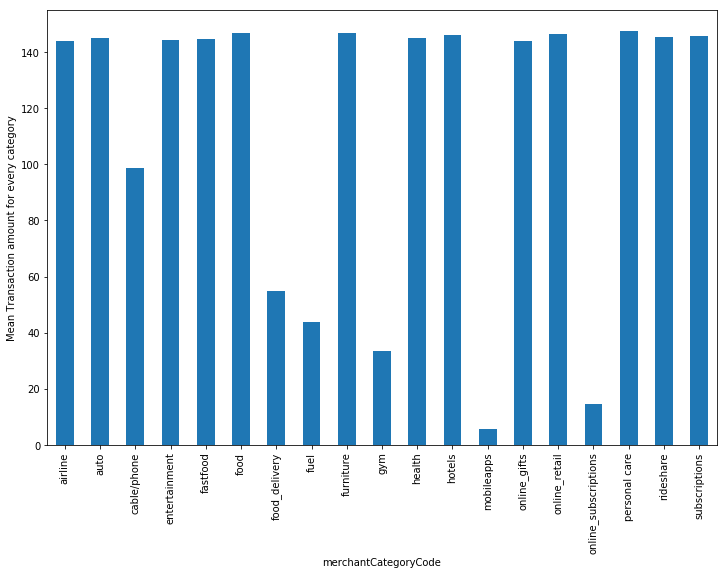

In [54]:
ax = catmean.plot(kind = 'bar',figsize=(12,8))
ax.set_ylabel('Mean Transaction amount for every category')
plt.show()

In [57]:
transaction.groupby('merchantCategoryCode').size()

merchantCategoryCode
airline                   9990
auto                     10147
cable/phone               1490
entertainment            69138
fastfood                101196
food                     68245
food_delivery             4990
fuel                     22566
furniture                 7813
gym                       2874
health                   14344
hotels                   22879
mobileapps               14614
online_gifts             33045
online_retail           161469
online_subscriptions     11247
personal care            16917
rideshare                50574
subscriptions            18376
dtype: int64

In [63]:
(transaction.groupby(['accountNumber'])['creditLimit'].mean()).mean()

10226.5

### Part 3

To observe the patterns of the transactions, lets display more rows.

In [64]:
pd.options.display.max_rows = 200

In [65]:
transaction.head(500)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,2020-04-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08 19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,2023-06-01,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09 22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,2027-12-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11 13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,2029-09-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11 22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,2024-10-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16 01:41:11,ADDRESS_VERIFICATION
5,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,2021-02-01,733493772,2014-08-03,492,False,False,online_gifts,US,Fresh eCards,01,05,9.80,2016-01-16 21:35:27,PURCHASE
6,733493772,2014-08-03,US,4439.38,492,9184,False,5000.0,560.62,2026-01-01,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,05,247.99,2016-01-24 07:54:01,PURCHASE
7,733493772,2014-08-03,US,4191.39,492,9184,False,5000.0,808.61,2031-12-01,733493772,2014-08-03,492,False,False,personal care,US,Universe Massage #95463,01,05,0.00,2016-01-26 05:28:24,ADDRESS_VERIFICATION
8,733493772,2014-08-03,US,4191.39,492,9184,True,5000.0,808.61,2024-04-01,733493772,2014-08-03,492,False,False,personal care,US,Universe Massage #70014,01,05,11.54,2016-01-26 12:18:14,PURCHASE
9,733493772,2014-08-03,US,4179.85,492,9184,True,5000.0,820.15,2024-04-01,733493772,2014-08-03,492,False,False,personal care,US,Universe Massage #70014,01,05,11.54,2016-01-26 12:19:15,REVERSAL


In [66]:
transaction['duplicated'] = ((transaction['transactionType']!='REVERSAL')&
                                     (transaction['merchantCategoryCode'] == transaction['merchantCategoryCode'].shift(1))&
                                     (transaction['merchantName'] == transaction['merchantName'].shift(1)) & 
                                     ((transaction['transactionAmount'] == transaction['transactionAmount'].shift(1)) & 
                                      (transaction['accountNumber'] == transaction['accountNumber'])) &
                                     (((transaction['transactionDateTime']-transaction['transactionDateTime'].shift(1))/np.timedelta64(1,'D'))<=1)
                                     )


In [67]:
transaction.head(5)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,2020-04-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08 19:04:50,PURCHASE,False
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,2023-06-01,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09 22:32:39,PURCHASE,False
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,2027-12-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11 13:36:55,PURCHASE,False
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,2029-09-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11 22:47:46,PURCHASE,False
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,2024-10-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16 01:41:11,ADDRESS_VERIFICATION,False


In [68]:
rev=transaction[transaction['transactionType']=='REVERSAL']

In [69]:
dupl=transaction[transaction['duplicated']==True]

In [70]:
dupl

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
120,733493772,2014-08-03,US,3811.33,492,9184,False,5000.0,1188.67,2020-09-01,733493772,2016-06-26,492,False,False,rideshare,US,Lyft,01,05,103.81,2016-09-08 07:51:27,PURCHASE,True
300,965952336,2013-01-11,US,1807.13,286,4029,False,7500.0,5692.87,2027-10-01,965952336,2016-02-08,286,False,False,online_retail,US,ebay.com,01,05,394.24,2016-03-10 23:06:20,PURCHASE,True
346,965952336,2013-01-11,US,609.35,286,4029,False,7500.0,6890.65,2029-02-01,965952336,2016-02-08,286,False,False,online_retail,US,ebay.com,01,02,20.35,2016-06-11 22:52:55,PURCHASE,True
399,965952336,2013-01-11,US,1242.15,286,4029,True,7500.0,6257.85,2028-05-01,965952336,2016-02-08,286,False,False,hotels,US,Rodeway Inn #700975,01,05,161.08,2016-09-10 02:50:47,PURCHASE,True
431,965952336,2013-01-11,US,3401.57,258,1562,False,7500.0,4098.43,2028-06-01,965952336,2016-02-08,258,False,False,online_retail,US,gap.com,99,02,37.62,2016-11-02 13:45:49,PURCHASE,True
896,885773130,2015-04-09,US,4949.25,612,9852,False,7500.0,2550.75,2027-03-01,885773130,2015-04-09,612,False,False,online_retail,US,oldnavy.com,08,05,77.88,2016-05-28 17:50:14,PURCHASE,True
997,885773130,2015-04-09,US,5687.52,612,9852,True,7500.0,1812.48,2020-03-01,885773130,2016-07-06,612,False,False,food,US,Franks Pub #87366,01,05,50.93,2016-10-18 20:19:16,PURCHASE,True
1071,799731758,2015-10-16,US,49875.23,159,7155,True,50000.0,124.77,2028-07-01,799731758,2015-10-16,159,False,False,food,US,Dinosaur Sandwitch Bar #960325,08,09,124.77,2016-09-01 08:10:36,PURCHASE,True
1230,784469543,2008-08-21,US,1095.64,479,8915,False,2500.0,1404.36,2026-05-01,784469543,2016-04-09,479,False,False,hotels,US,Hyatt House #461673,01,05,271.60,2016-05-11 05:43:42,PURCHASE,True
1290,784469543,2008-08-21,US,1700.09,479,8915,True,2500.0,799.91,2020-12-01,784469543,2016-04-09,479,False,False,hotels,US,Hilton Hotels #89655,01,05,401.06,2016-07-07 16:39:42,PURCHASE,True


### Part 4

In [71]:
transaction.dtypes

accountNumber                        int64
accountOpenDate             datetime64[ns]
acqCountry                          object
availableMoney                     float64
cardCVV                              int64
cardLast4Digits                      int64
cardPresent                           bool
creditLimit                        float64
currentBalance                     float64
currentExpDate              datetime64[ns]
customerId                          object
dateOfLastAddressChange     datetime64[ns]
enteredCVV                           int64
expirationDateKeyInMatch              bool
isFraud                               bool
merchantCategoryCode                object
merchantCountryCode                 object
merchantName                        object
posConditionCode                    object
posEntryMode                        object
transactionAmount                  float64
transactionDateTime         datetime64[ns]
transactionType                     object
duplicated 

In [72]:
(transaction[transaction['transactionType']=='ADDRESS_VERIFICATION']).groupby('isFraud').size()

isFraud
False    16391
True        87
dtype: int64

In [73]:
(transaction[transaction['transactionType']=='REVERSAL']).groupby('isFraud').size()

isFraud
False    15869
True       293
dtype: int64

#### Integer columns

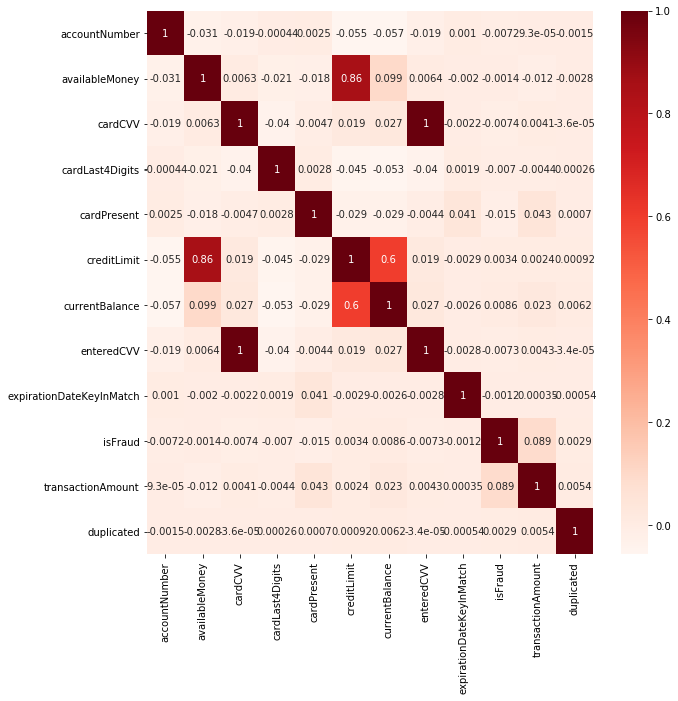

In [74]:
plt.figure(figsize=(10,10))
cor = transaction.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [75]:
cor_target = abs(cor["isFraud"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.008]
relevant_features

cardPresent          0.014946
currentBalance       0.008611
isFraud              1.000000
transactionAmount    0.088708
Name: isFraud, dtype: float64

In [76]:
cor_target[cor_target<0.008]

accountNumber               0.007157
availableMoney              0.001379
cardCVV                     0.007402
cardLast4Digits             0.007010
creditLimit                 0.003357
enteredCVV                  0.007347
expirationDateKeyInMatch    0.001239
duplicated                  0.002946
Name: isFraud, dtype: float64

#### Categorical columns

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

In [77]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V <br>
https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [78]:
catCols=['isFraud','acqCountry','merchantCategoryCode','merchantCountryCode','merchantName','transactionType','posEntryMode','posConditionCode']

In [79]:
import itertools

corrM = np.zeros((len(catCols),len(catCols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(catCols, 2):
    idx1, idx2 = catCols.index(col1), catCols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(transaction[col1], transaction[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]


In [80]:
corrCat = pd.DataFrame(corrM, index=catCols, columns=catCols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corrCat, annot=True, ax=ax); 
ax.set_title("Cramer V Correlation between Variables");

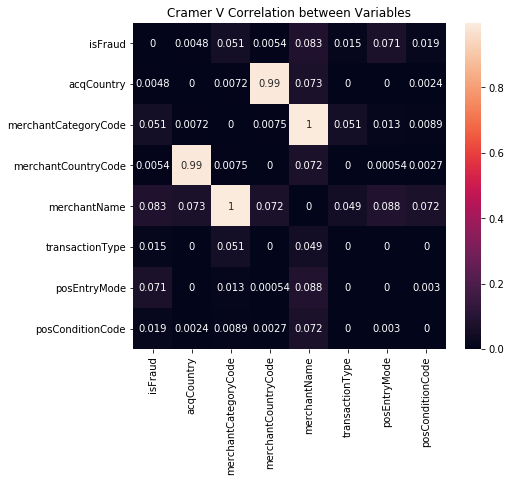

In [81]:
plt.show()

In [82]:
cor_target = (corrCat["isFraud"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.008]
relevant_features

merchantCategoryCode    0.051460
merchantName            0.082775
transactionType         0.015113
posEntryMode            0.070797
posConditionCode        0.019179
Name: isFraud, dtype: float64

In [83]:
cor_target[cor_target<0.008]

isFraud                0.000000
acqCountry             0.004810
merchantCountryCode    0.005386
Name: isFraud, dtype: float64

In [84]:
len(transaction['merchantName'].unique())

2493

In [85]:
print('Number of unique categories',len(transaction['merchantCategoryCode'].unique()))
transaction['merchantCategoryCode'].value_counts()

Number of unique categories 19


online_retail           161469
fastfood                101196
entertainment            69138
food                     68245
rideshare                50574
online_gifts             33045
hotels                   22879
fuel                     22566
subscriptions            18376
personal care            16917
mobileapps               14614
health                   14344
online_subscriptions     11247
auto                     10147
airline                   9990
furniture                 7813
food_delivery             4990
gym                       2874
cable/phone               1490
Name: merchantCategoryCode, dtype: int64

In [86]:
transaction['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'], dtype=object)

In [87]:
data=transaction[transaction['duplicated'] == False]

In [88]:
data=data.drop(['duplicated'],axis=1)

In [89]:
data['posEntryMode'].unique()

array(['05', '09', '02', '90', '00', '80'], dtype=object)

In [90]:
data['posConditionCode'].unique()

array(['01', '08', '99'], dtype=object)

In [91]:
data=data.drop(['acqCountry','merchantCountryCode','merchantName','accountNumber','availableMoney','cardCVV','cardLast4Digits','creditLimit','enteredCVV','expirationDateKeyInMatch'],axis=1)  

In [92]:
newData=pd.get_dummies(data, columns=['transactionType','merchantCategoryCode','posEntryMode','posConditionCode'], drop_first=False)

#### Date columns

In [93]:
newData['day_of_trans']=newData['transactionDateTime'].dt.day
newData['month_of_trans']=newData['transactionDateTime'].dt.month
newData['year_of_trans']=newData['transactionDateTime'].dt.year
newData['hour_of_trans']=newData['transactionDateTime'].dt.hour
newData['week_of_trans']=newData['transactionDateTime'].dt.weekday_name

In [94]:
newData['age_of_acnt']=(newData['transactionDateTime']-newData['accountOpenDate'])/ np.timedelta64(1, 'D')

In [95]:
newData['age_rem']=(newData['currentExpDate']-newData['transactionDateTime'])/ np.timedelta64(1, 'D')

In [96]:
newData['addr_change']=(newData['transactionDateTime']-newData['dateOfLastAddressChange'])/ np.timedelta64(1, 'D')

In [97]:
newData=newData.drop(['transactionDateTime','currentExpDate','dateOfLastAddressChange','accountOpenDate'],axis=1)

In [98]:
newData=pd.get_dummies(newData, columns=['week_of_trans'], drop_first=False)

In [99]:
newData.dtypes

cardPresent                                     bool
currentBalance                               float64
customerId                                    object
isFraud                                         bool
transactionAmount                            float64
transactionType_ADDRESS_VERIFICATION           uint8
transactionType_PURCHASE                       uint8
transactionType_REVERSAL                       uint8
merchantCategoryCode_airline                   uint8
merchantCategoryCode_auto                      uint8
merchantCategoryCode_cable/phone               uint8
merchantCategoryCode_entertainment             uint8
merchantCategoryCode_fastfood                  uint8
merchantCategoryCode_food                      uint8
merchantCategoryCode_food_delivery             uint8
merchantCategoryCode_fuel                      uint8
merchantCategoryCode_furniture                 uint8
merchantCategoryCode_gym                       uint8
merchantCategoryCode_health                   

In [100]:
newData.groupby('isFraud').size()

isFraud
False    624570
True      11169
dtype: int64

In [103]:
target=newData['isFraud']
finaldf=newData.drop(['isFraud'],axis=1)

In [117]:
train_features, test_features, train_labels, test_labels = train_test_split(finaldf, target, test_size = 0.25, random_state = 42)

In [118]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (476804, 49)
Training Labels Shape: (476804,)
Testing Features Shape: (158935, 49)
Testing Labels Shape: (158935,)


In [119]:
clf = RandomForestClassifier()

clf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
preds=clf.predict(test_features)

In [121]:
preds_train=clf.predict(train_features)

In [122]:
accuracy_score(preds_train,train_labels)*100

99.55705069588342

In [123]:
accuracy_score(preds,test_labels)*100

98.18416333721332

In [124]:
pd.crosstab(test_labels, preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,156041,10
True,2876,8


In [125]:
pd.crosstab(train_labels, preds_train, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,468519,0
True,2112,6173


In [143]:
precision_score(test_labels,preds)

0.6814285714285714

In [144]:
recall_score(test_labels,preds)

0.6782794169925347

### Downsampling

In [126]:
newData = newData.sample(frac=1)

frauds = newData.loc[newData['isFraud'] == True]
non_frauds = newData.loc[newData['isFraud'] == 0][:len(frauds)]

underSamp = pd.concat([frauds, non_frauds])

# Shuffle dataframe rows
underSamp = underSamp.sample(frac=1)

underSamp.head()


,cardPresent,currentBalance,customerId,isFraud,transactionAmount,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
479753,False,4099.86,938310147,True,83.98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,28,6,2016,13,2075.568519,5542.431481,2075.568519,0,0,0,0,0,1,0
639059,False,3984.92,318312685,True,66.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,24,6,2016,18,306.789873,3873.210127,306.789873,1,0,0,0,0,0,0
30390,False,2132.71,370802346,True,394.29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,19,12,2016,3,1218.140590,5337.859410,31.140590,0,1,0,0,0,0,0
270217,False,1682.47,792317293,False,37.67,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,5,10,2016,11,504.485718,5169.514282,21.485718,0,0,0,0,0,0,1
390994,True,13287.05,378029122,True,95.31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,2,8,2016,18,720.773264,881.226736,89.773264,0,0,0,0,0,1,0


In [127]:
len(underSamp)

22338

In [128]:
underSamp.groupby('isFraud').size()

isFraud
False    11169
True     11169
dtype: int64

In [129]:
target=underSamp['isFraud']

In [130]:
finalDf=underSamp.drop(['isFraud'],axis=1)

In [131]:
finalDf.head(3)

,cardPresent,currentBalance,customerId,transactionAmount,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
479753,False,4099.86,938310147,83.98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,28,6,2016,13,2075.568519,5542.431481,2075.568519,0,0,0,0,0,1,0
639059,False,3984.92,318312685,66.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,24,6,2016,18,306.789873,3873.210127,306.789873,1,0,0,0,0,0,0
30390,False,2132.71,370802346,394.29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,19,12,2016,3,1218.140590,5337.859410,31.140590,0,1,0,0,0,0,0


In [132]:
finalDf.shape

(22338, 49)

In [133]:

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(finalDf, target, test_size = 0.25, random_state = 42)

In [134]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16753, 49)
Training Labels Shape: (16753,)
Testing Features Shape: (5585, 49)
Testing Labels Shape: (5585,)


#### Random Forest

In [135]:
param_rf = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [136]:
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=param_rf, cv=5, iid=False)
grid_search_rf.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
preds=grid_search_rf.predict(test_features)

In [138]:
pd.crosstab(test_labels, preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,1880,892
True,905,1908


In [139]:
print('Performance of random forest with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(test_labels, preds, average='macro'))
print('Recall score: ',recall_score(test_labels, preds, average='macro'))
print('Accuracy Score: ',accuracy_score(test_labels, preds))
print('F-1 Score: ',f1_score(test_labels, preds, average='macro'))

Performance of random forest with undersampling and grid search on test set

Precision score:  0.6782367273659913
Recall score:  0.6782450476016064
Accuracy Score:  0.6782452999104744
F-1 Score:  0.6782372125737955


In [140]:
preds_train=grid_search_rf.predict(train_features)

In [141]:
pd.crosstab(train_labels, preds_train, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,8243,154
True,125,8231


In [142]:
print('Performance of random forest with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(train_labels, preds_train, average='macro'))
print('Recall score: ',recall_score(train_labels, preds_train, average='macro'))
print('Accuracy Score: ',accuracy_score(train_labels, preds_train))
print('F-1 Score: ',f1_score(train_labels, preds_train, average='macro'))

Performance of random forest with undersampling and grid search on train set

Precision score:  0.9833480057486794
Recall score:  0.983350403016692
Accuracy Score:  0.9833462663403569
F-1 Score:  0.9833462577958078


#### Logistic regression

In [145]:
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(), lr_params)
grid_lr.fit(train_features, train_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [146]:
preds_lr=grid_lr.predict(test_features)

In [147]:
pd.crosstab(test_labels, preds_lr, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,1821,951
True,837,1976


In [148]:
print('Performance of Logistic regression with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(test_labels, preds_lr, average='macro'))
print('Recall score: ',recall_score(test_labels, preds_lr, average='macro'))
print('Accuracy Score: ',accuracy_score(test_labels, preds_lr))
print('F-1 Score: ',f1_score(test_labels, preds_lr, average='macro'))

Performance of Logistic regression with undersampling and grid search on test set

Precision score:  0.6800977664940953
Recall score:  0.6796896520945579
Accuracy Score:  0.6798567591763652
F-1 Score:  0.6796099871022387


In [149]:
preds_train_lr=grid_lr.predict(train_features)

In [150]:
pd.crosstab(train_labels, preds_train_lr, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,5533,2864
True,2416,5940


In [ ]:
print('Performance of logistic regression with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(train_labels, preds_train_lr, average='macro'))
print('Recall score: ',recall_score(train_labels, preds_train_lr, average='macro'))
print('Accuracy Score: ',accuracy_score(train_labels, preds_train_lr))
print('F-1 Score: ',f1_score(train_labels, preds_train_lr, average='macro'))

Performance of logistic regression with undersampling and grid search on train set

Precision score:  0.6853778595017567
Recall score:  0.6848961250550343
Accuracy Score:  0.6848325673013789
F-1 Score:  0.6846464437312352


#### Support Vector Machine

In [ ]:
svc_params = {'C': [0.5, 0.7, 0.9], 'kernel': [ 'poly', 'linear']}
grid_svm = GridSearchCV(SVC(), svc_params)
grid_svm.fit(train_features, train_labels)

In [ ]:
preds_svm=grid_svm.predict(test_features)

In [ ]:
pd.crosstab(test_labels, preds_svm, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of SVM with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(test_labels, preds_svm, average='macro'))
print('Recall score: ',recall_score(test_labels, preds_svm, average='macro'))
print('Accuracy Score: ',accuracy_score(test_labels, preds_svm))
print('F-1 Score: ',f1_score(test_labels, preds_svm, average='macro'))

In [ ]:
preds_train_svm=grid_svm.predict(train_features)

In [ ]:
pd.crosstab(train_labels, preds_train_svm, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of SVM with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(train_labels, preds_train_svm, average='macro'))
print('Recall score: ',recall_score(train_labels, preds_train_svm, average='macro'))
print('Accuracy Score: ',accuracy_score(train_labels, preds_train_svm))
print('F-1 Score: ',f1_score(train_labels, preds_train_svm, average='macro'))

### Upsampling

In [ ]:
# upsample minority
fraud_upsampled = resample(frauds,
                          replace=True, # sample with replacement
                          n_samples=len(not_frauds) # match number in majority class) 
# combine majority and upsampled minority
upsamp = pd.concat([not_frauds, fraud_upsampled])

# check new class counts
upsamp.Class.value_counts()


In [ ]:
len(upsamp)

In [ ]:
upsamp.groupby('isFraud').size()

In [ ]:
targetup=upsamp['isFraud']

In [ ]:
finalDfup=upsamp.drop(['isFraud'],axis=1)

In [ ]:
finalDfup.head(3)

In [ ]:
finalDfup.shape

In [ ]:

# Split the data into training and testing sets
trainup_features, testup_features, trainup_labels, testup_labels = train_test_split(finalDfup, targetup, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', trainup_features.shape)
print('Training Labels Shape:', trainup_labels.shape)
print('Testing Features Shape:', testup_features.shape)
print('Testing Labels Shape:', testup_labels.shape)

#### Random Forest

In [ ]:
param_rf = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
rf = RandomForestClassifier()
grid_search_rfup = GridSearchCV(rf, param_grid=param_rf, cv=5, iid=False)
grid_search_rfup.fit(trainup_features, trainup_labels)

In [ ]:
predsup=grid_search_rfup.predict(testup_features)

In [ ]:
pd.crosstab(testup_labels, predsup, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of random forest with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(testup_labels, predsup, average='macro'))
print('Recall score: ',recall_score(testup_labels, predsup, average='macro'))
print('Accuracy Score: ',accuracy_score(testup_labels, predsup))
print('F-1 Score: ',f1_score(testup_labels, predsup, average='macro'))

In [ ]:
preds_trainup=grid_search_rfup.predict(trainup_features)

In [ ]:
pd.crosstab(trainup_labels, preds_trainup, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of random forest with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(trainup_labels, preds_trainup, average='macro'))
print('Recall score: ',recall_score(trainup_labels, preds_trainup, average='macro'))
print('Accuracy Score: ',accuracy_score(trainup_labels, preds_trainup))
print('F-1 Score: ',f1_score(trainup_labels, preds_trainup, average='macro'))

#### Logistic regression

In [ ]:
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lrup = GridSearchCV(LogisticRegression(), lr_params)
grid_lrup.fit(trainup_features, trainup_labels)

In [ ]:
preds_lrup=grid_lrup.predict(test_features)

In [ ]:
pd.crosstab(testup_labels, preds_lrup, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of Logistic regression with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(testup_labels, preds_lrup, average='macro'))
print('Recall score: ',recall_score(testup_labels, preds_lrup, average='macro'))
print('Accuracy Score: ',accuracy_score(testup_labels, preds_lrup))
print('F-1 Score: ',f1_score(testup_labels, preds_lrup, average='macro'))

In [ ]:
preds_train_lrup=grid_lrup.predict(trainup_features)

In [ ]:
pd.crosstab(trainup_labels, preds_train_lrup, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of logistic regression with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(trainup_labels, preds_train_lrup, average='macro'))
print('Recall score: ',recall_score(trainup_labels, preds_train_lrup, average='macro'))
print('Accuracy Score: ',accuracy_score(trainup_labels, preds_train_lrup))
print('F-1 Score: ',f1_score(trainup_labels, preds_train_lrup, average='macro'))

#### Support Vector Machine

In [ ]:
svc_params = {'C': [0.5, 0.7, 0.9], 'kernel': ['rbf', 'poly','linear']}
grid_svmup = GridSearchCV(SVC(), svc_params)
grid_svmup.fit(trainup_features, trainup_labels)

In [ ]:
preds_svmup=grid_svmup.predict(testup_features)

In [ ]:
pd.crosstab(testup_labels, preds_svmup, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of SVM with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(testup_labels, preds_svmup, average='macro'))
print('Recall score: ',recall_score(testup_labels, preds_svmup, average='macro'))
print('Accuracy Score: ',accuracy_score(testup_labels, preds_svmup))
print('F-1 Score: ',f1_score(testup_labels, preds_svmup, average='macro'))

In [ ]:
preds_train_svmup=grid_svmup.predict(trainup_features)

In [ ]:
pd.crosstab(trainup_labels, preds_train_svmup, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
print('Performance of SVM with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(trainup_labels, preds_train_svmup, average='macro'))
print('Recall score: ',recall_score(trainup_labels, preds_train_svmup, average='macro'))
print('Accuracy Score: ',accuracy_score(trainup_labels, preds_train_svmup))
print('F-1 Score: ',f1_score(trainup_labels, preds_train_svmup, average='macro'))